In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector 
import pyodbc

In [9]:
conn=pyodbc.connect(
"Driver={SQL Server};"
"Server=ब्राह्मण\MSSQLSERVER01;"
"Database=d_project;"
"Trusted_Connection=yes;"


)
cursor=conn.cursor()
cursor.execute("SELECT @@VERSION")
for row in cursor:
    print(row)

print("Connected Successfully!")    

('Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \n\tOct  8 2022 05:58:25 \n\tCopyright (C) 2022 Microsoft Corporation\n\tDeveloper Edition (64-bit) on Windows 10 Pro 10.0 <X64> (Build 26200: ) (Hypervisor)\n',)
Connected Successfully!


In [10]:
query ="select * from orders_superstore"
df=pd.read_sql(query,conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_13336\943678647.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


In [11]:
df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_Name,Sales,Quantity,Discount,Profit,year,month,Profit_margin,region_manager,returned
0,US-2023-103800,2023-01-03,2023-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448000,2,0.2,5.551200,2023,1,0.34,Roxanne Rodriguez,no
1,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,GBC Standard Plastic Binding Systems Combs,3.540000,2,0.8,-5.487000,2023,1,-1.55,Roxanne Rodriguez,no
2,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Avery 508,11.784000,3,0.2,4.271700,2023,1,0.36,Roxanne Rodriguez,no
3,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,SAFCO Boltless Steel Shelving,272.735992,3,0.2,-64.774803,2023,1,-0.24,Roxanne Rodriguez,no
4,US-2023-141817,2023-01-05,2023-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.535999,3,0.2,4.884000,2023,1,0.25,Chuck Magee,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,US-2026-143259,2026-12-30,2027-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Wilson Jones Legal Size Ring Binders,52.776001,3,0.2,19.791000,2026,12,0.38,Chuck Magee,no
10188,US-2026-115427,2026-12-30,2027-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,GBC Binding covers,20.719999,2,0.2,6.475000,2026,12,0.31,Sadie Pawthorne,yes
10189,US-2026-156720,2026-12-30,2027-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,Bagged Rubber Bands,3.024000,3,0.2,-0.604800,2026,12,-0.20,Sadie Pawthorne,no
10190,US-2026-143259,2026-12-30,2027-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Gear Head AU3700S Headset,90.930000,7,0.0,2.727900,2026,12,0.03,Chuck Magee,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        10192 non-null  object 
 1   Order_Date      10192 non-null  object 
 2   Ship_Date       10192 non-null  object 
 3   Ship_Mode       10192 non-null  object 
 4   Customer_ID     10192 non-null  object 
 5   Customer_Name   10192 non-null  object 
 6   Segment         10192 non-null  object 
 7   Country         10192 non-null  object 
 8   City            10192 non-null  object 
 9   State           10192 non-null  object 
 10  Region          10192 non-null  object 
 11  Product_ID      10192 non-null  object 
 12  Category        10192 non-null  object 
 13  Sub_Category    10192 non-null  object 
 14  Product_Name    10192 non-null  object 
 15  Sales           10192 non-null  float64
 16  Quantity        10192 non-null  int64  
 17  Discount        10192 non-null 

In [13]:
#Statastical summary 
df.describe()

,Sales,Quantity,Discount,Profit,year,month,Profit_margin
count,10192.000000,10192.000000,10192.000000,10191.000000,10192.000000,10192.000000,10192.000000
mean,228.233306,3.791601,0.155386,28.720779,2024.720467,7.811911,0.122424
std,619.966119,2.228075,0.206258,232.456479,1.125463,3.295871,0.465096
min,0.444000,1.000000,0.000000,-6599.978027,2023.000000,1.000000,-2.750000
25%,17.219999,2.000000,0.000000,1.762400,2024.000000,5.000000,0.080000
50%,53.890001,3.000000,0.200000,8.690000,2025.000000,9.000000,0.270000
75%,209.500000,5.000000,0.200000,29.293850,2026.000000,11.000000,0.360000
max,22638.480469,14.000000,0.800000,8399.975586,2026.000000,12.000000,0.500000


In [15]:
#check missing values
df.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            1
year              0
month             0
Profit_margin     0
region_manager    0
returned          0
dtype: int64

In [21]:
#total sales by region
sr=df.groupby("Region")["Sales"].sum()

In [22]:
#Sales by category
sc=df.groupby("Category")["Sales"].sum()

In [23]:
#profit by subcategory
psc=df.groupby("Sub_Category")["Profit"].sum()

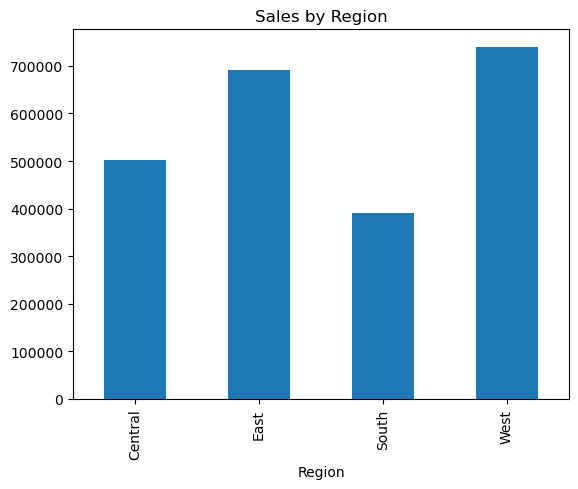

In [24]:
sr.plot(kind="bar")
plt.title("Sales by Region")
plt.show()

<Axes: xlabel='Category', ylabel='Profit'>

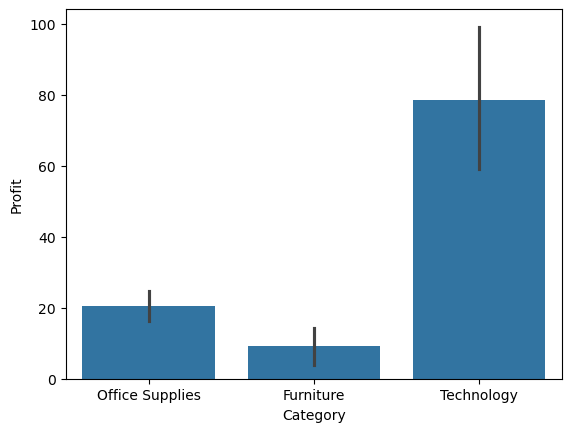

In [25]:
#category profit chart
sns.barplot(x=df.Category,y=df.Profit)

In [26]:
df["customer_total_sales"]=df.groupby("Customer_Name")["Sales"].transform(sum)

C:\Users\hp\AppData\Local\Temp\ipykernel_13336\1967367209.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df["customer_total_sales"]=df.groupby("Customer_Name")["Sales"].transform(sum)


In [27]:
df

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,year,month,Profit_margin,region_manager,returned,customer_total_sales
0,US-2023-103800,2023-01-03,2023-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,16.448000,2,0.2,5.551200,2023,1,0.34,Roxanne Rodriguez,no,1050.636002
1,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,3.540000,2,0.8,-5.487000,2023,1,-1.55,Roxanne Rodriguez,no,1056.857997
2,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,11.784000,3,0.2,4.271700,2023,1,0.36,Roxanne Rodriguez,no,1056.857997
3,US-2023-112326,2023-01-04,2023-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,272.735992,3,0.2,-64.774803,2023,1,-0.24,Roxanne Rodriguez,no,1056.857997
4,US-2023-141817,2023-01-05,2023-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,...,19.535999,3,0.2,4.884000,2023,1,0.25,Chuck Magee,no,1428.231040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,US-2026-143259,2026-12-30,2027-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,52.776001,3,0.2,19.791000,2026,12,0.38,Chuck Magee,no,2493.213993
10188,US-2026-115427,2026-12-30,2027-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,20.719999,2,0.2,6.475000,2026,12,0.31,Sadie Pawthorne,yes,1643.255039
10189,US-2026-156720,2026-12-30,2027-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,3.024000,3,0.2,-0.604800,2026,12,-0.20,Sadie Pawthorne,no,303.948004
10190,US-2026-143259,2026-12-30,2027-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,90.930000,7,0.0,2.727900,2026,12,0.03,Chuck Magee,no,2493.213993


In [28]:
df["Profit_margin"]

0        0.34
1       -1.55
2        0.36
3       -0.24
4        0.25
         ... 
10187    0.38
10188    0.31
10189   -0.20
10190    0.03
10191   -0.20
Name: Profit_margin, Length: 10192, dtype: float64

In [ ]:
# top 10 customers
top_cust=df.groupby((["Customer_Name","Customer_ID"]))["Sales"].sum().sort_values(ascending=False)
top_cust.head(10)

Customer_Name       Customer_ID
Sean Miller         SM-20320       25043.050486
Tamara Chand        TC-20980       19052.217195
Raymond Buch        RB-19360       15117.338959
Tom Ashbrook        TA-21385       14595.619864
Adrian Barton       AB-10105       14473.571244
Ken Lonsdale        KL-16645       14175.228905
Sanjit Chand        SC-20095       14142.334138
Hunter Lopez        HL-15040       12873.297663
Sanjit Engle        SE-20110       12209.438140
Christopher Conant  CC-12370       12129.071537
Name: Sales, dtype: float64

In [ ]:
from sklearn.cluster import KMeans
x=df[["Sales","Profit"]]
x = x.fillna(x.mean())
Kmeans=KMeans(n_clusters=3)
df["Customer_segment"]=Kmeans.fit_predict(x)

,0
0,2
1,0
2,1


In [51]:
df.to_csv("ordera_python_cleaned",index=False)

In [52]:
conn.close()